# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

> **IMPORTANT**: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Always verify analyses and conclusions with your own expertise or additional sources.

## Overview

This notebook explores Dandiset 001361: "A flexible hippocampal population code for experience relative to reward". This dataset contains 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice.

The study investigates how hippocampal place cells encode information about rewards and experiences leading up to rewards. It demonstrates how the hippocampus constructs sequences spanning entire tasks, and how reward-relative neural representations adapt during learning.

Link to the Dandiset: [https://dandiarchive.org/dandiset/001361](https://dandiarchive.org/dandiset/001361)

## Required Packages

This notebook uses the following Python packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pynwb
import remfile
import seaborn as sns
from dandi.dandiapi import DandiAPIClient

# Set plotting defaults
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 8)

## Loading the Dandiset

First, let's connect to the DANDI archive and load the Dandiset information:

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

Found 152 assets in the dataset

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb


## Neural and Behavioral Data: Loading and Exploring an NWB File

For this exploration, we'll focus on one NWB file from mouse m11, session 03. This file contains both behavioral data and calcium imaging (ophys) data from hippocampal area CA1.

We'll load the file using PyNWB and remfile, which allows us to stream the data directly from the DANDI archive without downloading the full file:

In [3]:
# Define the asset URL
asset_id = "d77ea78a-8978-461d-9d11-3c5cef860d82"  # sub-m11/sub-m11_ses-03_behavior+ophys.nwb
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

# Load the NWB file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the NWB file
print(f"File identifier: {nwb.identifier}")
print(f"Session ID: {nwb.session_id}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Session description: {nwb.session_description}")
print(f"Imaging indicator: {nwb.imaging_planes['ImagingPlane'].indicator}")
print(f"Imaging location: {nwb.imaging_planes['ImagingPlane'].location}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


File identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
Session ID: 03
Subject ID: m11
Species: Mus musculus
Sex: M
Session description: processed suite2p data
Imaging indicator: GCaMP7f
Imaging location: hippocampus, CA1


## Exploring Behavioral Data

The NWB file contains rich behavioral data from the virtual navigation task. Let's examine the behavioral variables captured during the experiment:

In [4]:
# Access the behavior module
behavior = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"]

# List all the behavioral time series
time_series_names = list(behavior.time_series.keys())
print("Available behavioral time series:")
for name in time_series_names:
    print(f"- {name}")

Available behavioral time series:
- Reward
- autoreward
- environment
- lick
- position
- reward_zone
- scanning
- speed
- teleport
- trial number
- trial_start


### Visualizing Animal Position and Speed

Let's plot the animal's position and speed over time to understand the navigation behavior:

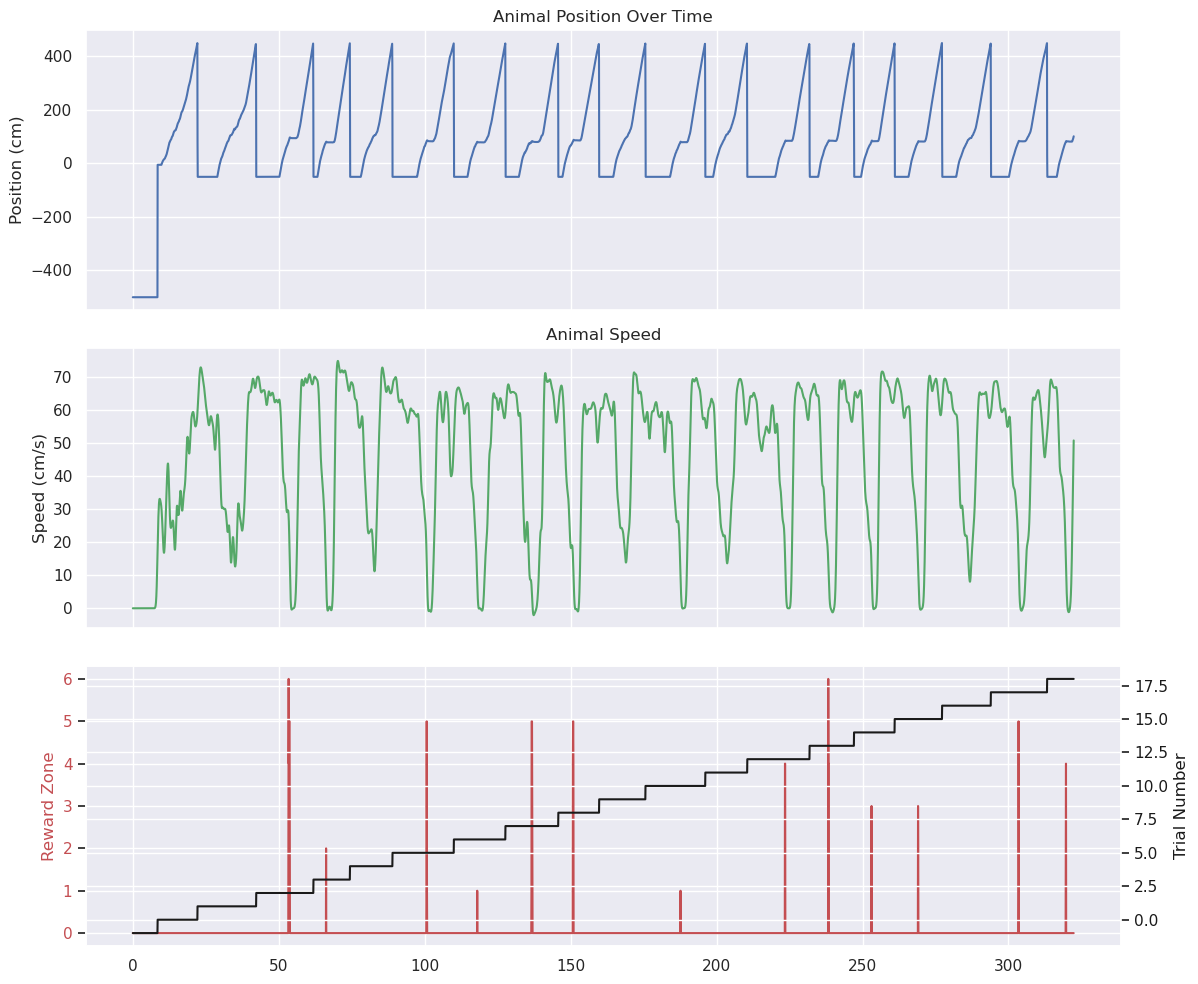

In [5]:
# Extract a subset of the data (first 5000 samples) to avoid loading too much data at once
num_samples = 5000
position_data = behavior.time_series["position"].data[:num_samples]
position_timestamps = behavior.time_series["position"].timestamps[:num_samples]
speed_data = behavior.time_series["speed"].data[:num_samples]
reward_zone_data = behavior.time_series["reward_zone"].data[:num_samples]
trial_number_data = behavior.time_series["trial number"].data[:num_samples]

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Position plot
axes[0].plot(position_timestamps, position_data, 'b-')
axes[0].set_ylabel('Position (cm)')
axes[0].set_title('Animal Position Over Time')

# Speed plot
axes[1].plot(position_timestamps, speed_data, 'g-')
axes[1].set_ylabel('Speed (cm/s)')
axes[1].set_title('Animal Speed')

# Reward zone entry and trial number
ax2 = axes[2]
ax2.plot(position_timestamps, reward_zone_data, 'r-', label='Reward Zone Entry')
ax2.set_ylabel('Reward Zone', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add trial number on a second y-axis
ax3 = ax2.twinx()
ax3.plot(position_timestamps, trial_number_data, 'k-', label='Trial Number')
ax3.set_ylabel('Trial Number', color='k')
ax3.set_xlabel('Time (s)')
ax3.tick_params(axis='y', labelcolor='k')

plt.tight_layout()
plt.show()

The plots above show:

1. **Position**: The animal moves through the virtual track in multiple trials, starting from position ~0 and moving to ~300 cm before returning to the start.

2. **Speed**: The animal shows consistent running patterns during navigation, with speeds up to ~70 cm/s.

3. **Reward Zone Entry and Trial Number**: The red spikes indicate when the animal enters reward zones, and the black line shows the trial number increasing over time.

This behavioral structure suggests a task where the animal navigates a linear track over multiple trials, receiving rewards at specific positions.

### Visualizing Trial Structure

Let's look more closely at how trials are structured, particularly the relationship between position, trial starts, and trial ends:

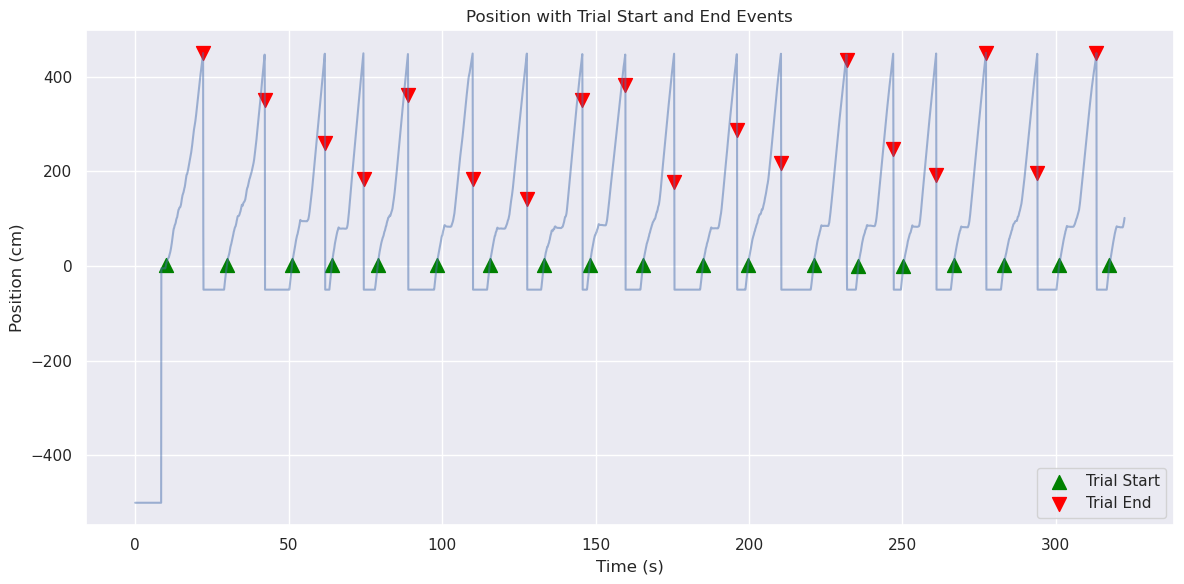

In [6]:
# Extract trial events
trial_start_data = behavior.time_series["trial_start"].data[:num_samples]
teleport_data = behavior.time_series["teleport"].data[:num_samples]

fig, ax = plt.subplots(figsize=(12, 6))
# Plot position data
ax.plot(position_timestamps, position_data, 'b-', alpha=0.5)

# Overlay trial start events
trial_start_events = np.where(trial_start_data > 0)[0]
if len(trial_start_events) > 0:
    ax.scatter(position_timestamps[trial_start_events], position_data[trial_start_events], 
               color='green', marker='^', s=100, label='Trial Start')

# Overlay teleport events (trial end)
teleport_events = np.where(teleport_data > 0)[0]
if len(teleport_events) > 0:
    ax.scatter(position_timestamps[teleport_events], position_data[teleport_events], 
               color='red', marker='v', s=100, label='Trial End')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Position (cm)')
ax.set_title('Position with Trial Start and End Events')
ax.legend()
plt.tight_layout()
plt.show()

From this visualization, we can see:

1. **Trial Starts** (green triangles) occur consistently at position ~0 cm.

2. **Trial Ends/Teleports** (red triangles) occur at various positions along the track.

3. The animal follows a clear pattern: start at position 0, navigate to some point on the track, then teleport back to the start for the next trial.

This trial structure is typical of virtual navigation experiments where animals complete laps on a linear track.

### Reward Information

Let's examine when and where rewards are delivered:

Number of reward events: 69
First 5 reward timestamps: [ 53.77934509  66.22468514 100.78790932 118.00503778 136.83425693]


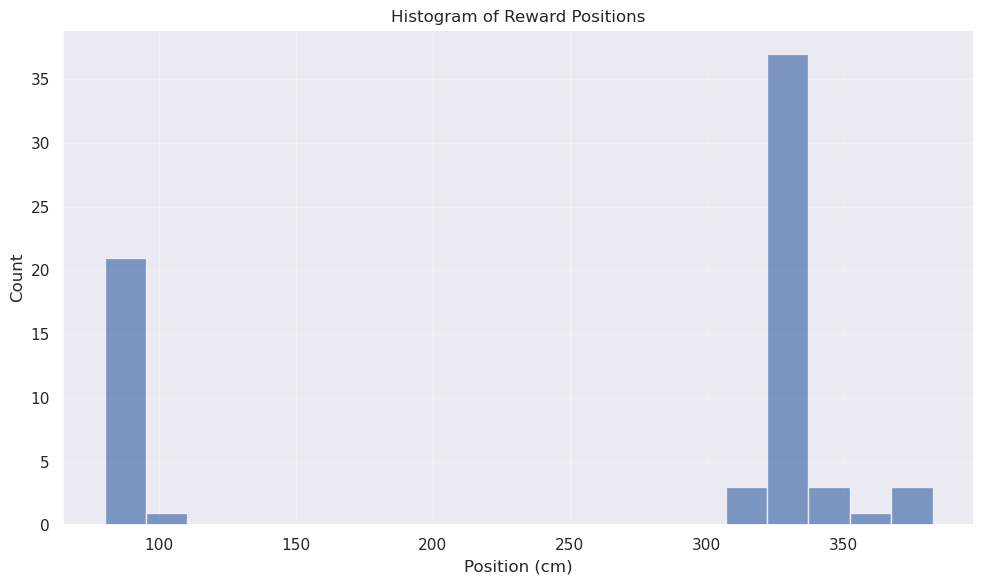

In [7]:
# Get reward data
reward_ts = behavior.time_series["Reward"]
reward_timestamps = reward_ts.timestamps[:]
reward_data = reward_ts.data[:]

print(f"Number of reward events: {len(reward_timestamps)}")
print(f"First 5 reward timestamps: {reward_timestamps[:5]}")

# Find position at each reward time
reward_positions = []

for reward_time in reward_timestamps:
    # Find the closest timestamp in the position data
    all_position_timestamps = behavior.time_series["position"].timestamps[:]
    idx = np.abs(all_position_timestamps - reward_time).argmin()
    reward_positions.append(behavior.time_series["position"].data[idx])

# Plot histogram of reward positions
plt.figure(figsize=(10, 6))
plt.hist(reward_positions, bins=20, alpha=0.7)
plt.xlabel('Position (cm)')
plt.ylabel('Count')
plt.title('Histogram of Reward Positions')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The reward position histogram shows that most rewards are delivered at around 100 cm on the track, with some variation. This suggests that there's a specific reward location in the virtual environment.

## Exploring Neural Data

Now let's examine the neural activity recorded with two-photon calcium imaging. The calcium imaging data includes fluorescence traces from cells in the hippocampal CA1 region.

In [8]:
# Access neural activity data
ophys = nwb.processing["ophys"]

# Get fluorescence data
fluor = ophys.data_interfaces["Fluorescence"].roi_response_series["plane0"]
fluor_rate = fluor.rate
print(f"Fluorescence sampling rate: {fluor_rate} Hz")
print(f"Fluorescence data shape: {fluor.data.shape}")  # (time, cells)

# Get ROI information
rois = fluor.rois.table
print(f"Number of ROIs: {len(rois.id[:])}")

# Check which ROIs are cells (vs not cells)
iscell = rois.iscell[:]
num_cells = np.sum(iscell[:, 0])
print(f"Number of cells: {num_cells}")
print(f"Number of non-cells: {len(iscell) - num_cells}")

Fluorescence sampling rate: 15.5078125 Hz
Fluorescence data shape: (19818, 349)
Number of ROIs: 349
Number of cells: 155.0
Number of non-cells: 194.0


### Visualizing Calcium Imaging Traces

Let's plot the fluorescence traces for a few example cells:

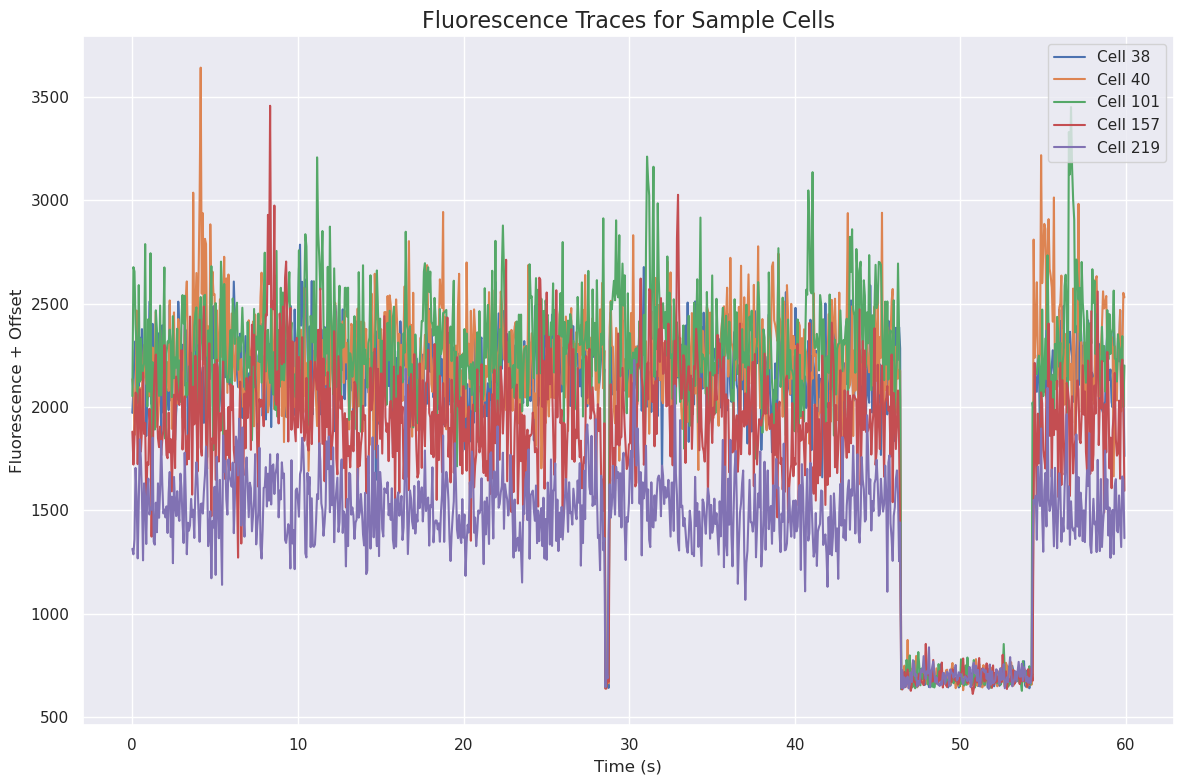

In [9]:
# Get a small sample of cells to plot
np.random.seed(42)  # For reproducibility
num_cells_to_plot = 5

# Only select from ROIs identified as cells
cell_indices = np.where(iscell[:, 0] == 1)[0]
selected_cells = np.sort(np.random.choice(cell_indices, 
                                     size=min(num_cells_to_plot, len(cell_indices)), 
                                     replace=False))

# Time window to plot (in seconds)
time_start = 0
time_window = 60  # seconds
samples_to_plot = int(time_window * fluor_rate)

# Load fluorescence data for the selected cells and time window
fluor_data_window = fluor.data[:samples_to_plot, :]
fluor_traces = fluor_data_window[:, selected_cells]

# Create time vector in seconds
time_vector = np.arange(fluor_traces.shape[0]) / fluor_rate

# Plot fluorescence traces
plt.figure(figsize=(12, 8))
plt.title("Fluorescence Traces for Sample Cells", fontsize=16)

for i, cell_idx in enumerate(selected_cells):
    # Offset each trace for better visualization
    offset = i * 3
    plt.plot(time_vector, fluor_traces[:, i] + offset, label=f"Cell {cell_idx}")

plt.xlabel("Time (s)")
plt.ylabel("Fluorescence + Offset")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

The fluorescence traces show typical calcium imaging activity patterns, with baseline fluorescence punctuated by transient increases that reflect neuronal spiking activity. Some cells show coordinated activity, while others have more independent patterns.

### Neural Activity and Position: Place Cells

Hippocampal CA1 neurons often exhibit "place cell" activity, where they fire preferentially at specific locations in an environment. Let's examine the relationship between neural activity and the animal's position:

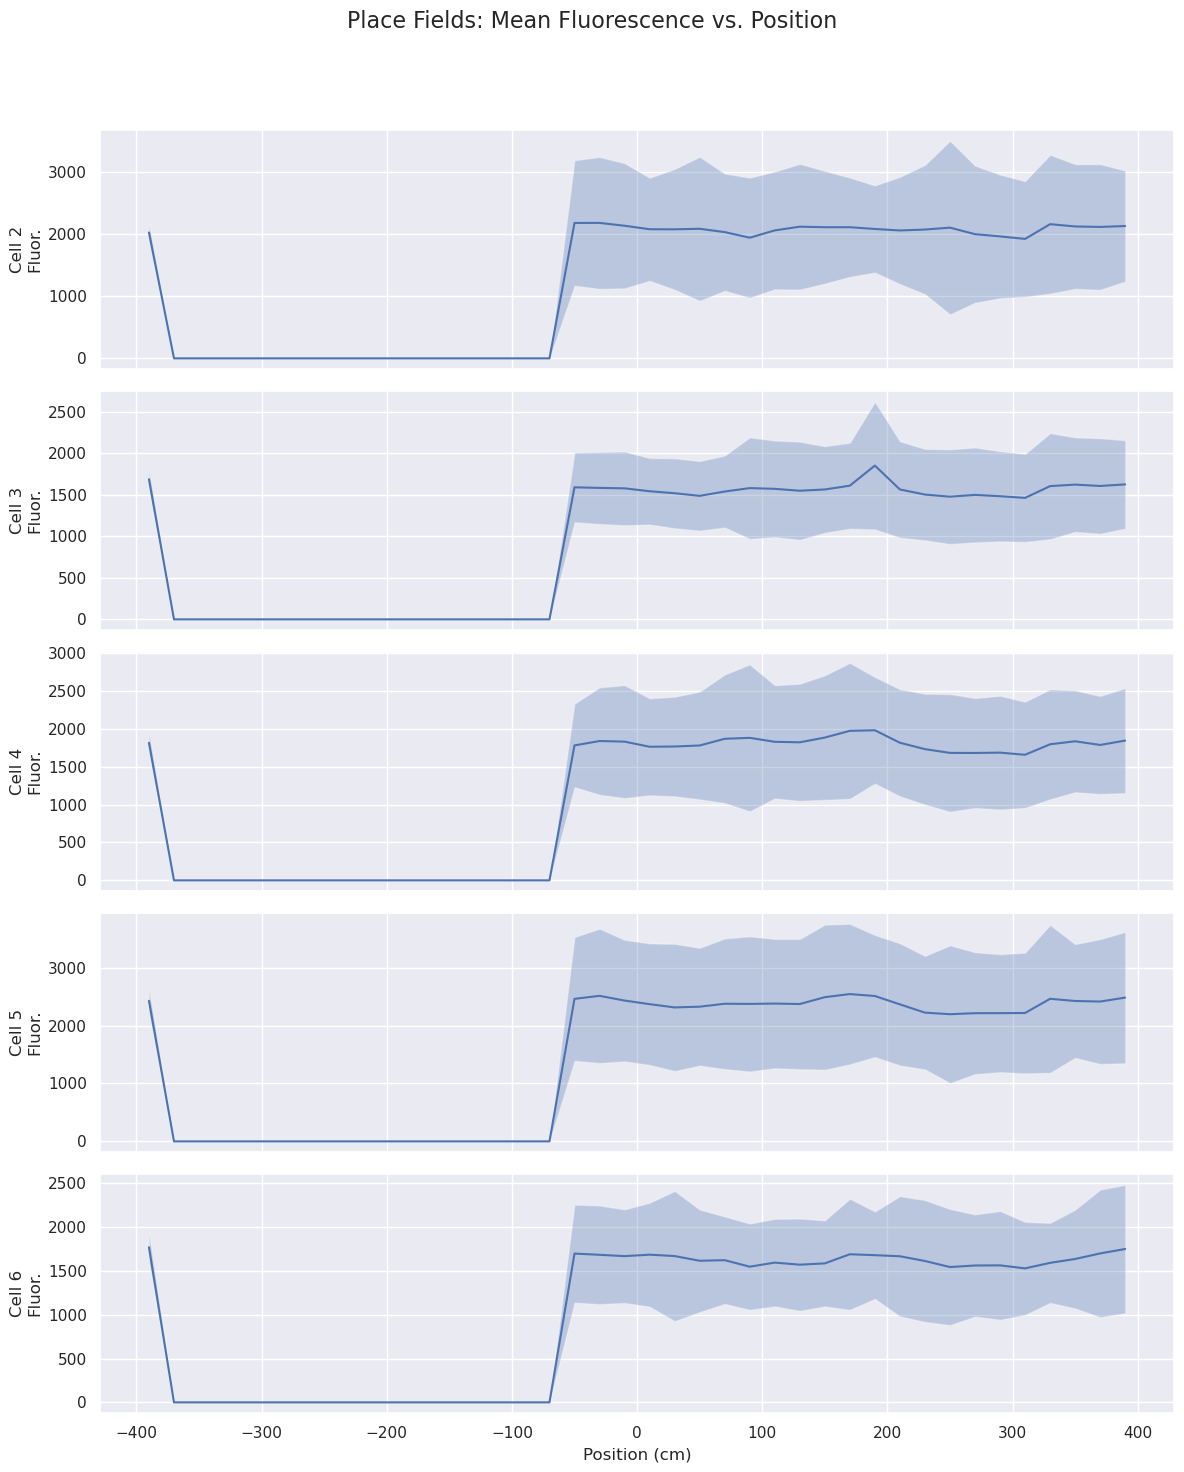

In [10]:
# Define position bins
position_bins = np.linspace(-400, 400, 41)  # 40 bins from -400 to 400 cm
bin_centers = (position_bins[:-1] + position_bins[1:]) / 2

# Get position at each neural sample time by interpolation
all_position_data = behavior.time_series["position"].data[:]
all_position_timestamps = behavior.time_series["position"].timestamps[:]
neural_time_vector = np.arange(fluor.data.shape[0]) / fluor_rate
interp_position = np.interp(neural_time_vector, all_position_timestamps, all_position_data)

# Discretize positions into bins
binned_positions = np.digitize(interp_position, position_bins) - 1
binned_positions = np.clip(binned_positions, 0, len(bin_centers) - 1)  # Ensure valid indices

# Select a few cells to analyze for place fields
num_place_cells = 5
place_cell_indices = cell_indices[:num_place_cells]

# Initialize place field arrays
place_fields = np.zeros((num_place_cells, len(bin_centers)))
place_fields_std = np.zeros_like(place_fields)

# Calculate mean activity for each position bin
for i, cell_idx in enumerate(place_cell_indices):
    cell_data = fluor.data[:, cell_idx]
    
    for j in range(len(bin_centers)):
        bin_samples = np.where(binned_positions == j)[0]
        if len(bin_samples) > 0:
            place_fields[i, j] = np.mean(cell_data[bin_samples])
            place_fields_std[i, j] = np.std(cell_data[bin_samples])

# Plot place fields for the selected cells
fig, axes = plt.subplots(num_place_cells, 1, figsize=(12, 3*num_place_cells), sharex=True)
plt.suptitle("Place Fields: Mean Fluorescence vs. Position", fontsize=16)

for i, (ax, cell_idx) in enumerate(zip(axes, place_cell_indices)):
    ax.plot(bin_centers, place_fields[i, :])
    ax.fill_between(bin_centers, 
                   place_fields[i, :] - place_fields_std[i, :],
                   place_fields[i, :] + place_fields_std[i, :],
                   alpha=0.3)
    ax.set_ylabel(f"Cell {cell_idx}\nFluor.")
    if i == num_place_cells - 1:  # Only label the bottom plot
        ax.set_xlabel("Position (cm)")

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust for the suptitle
plt.show()

The place field plots reveal that the neurons have strong spatial tuning. There appears to be a transition point around position -100 cm where neural activity increases substantially for most cells. Interestingly, the neurons are active in the positive position range (0 to 400 cm) but show very little activity in the negative range (-400 to -100 cm). This spatial selectivity is characteristic of hippocampal place cells.

### Visualizing Place Fields Across the Neural Population

Let's look at a heatmap of place fields across multiple neurons to get a population view:

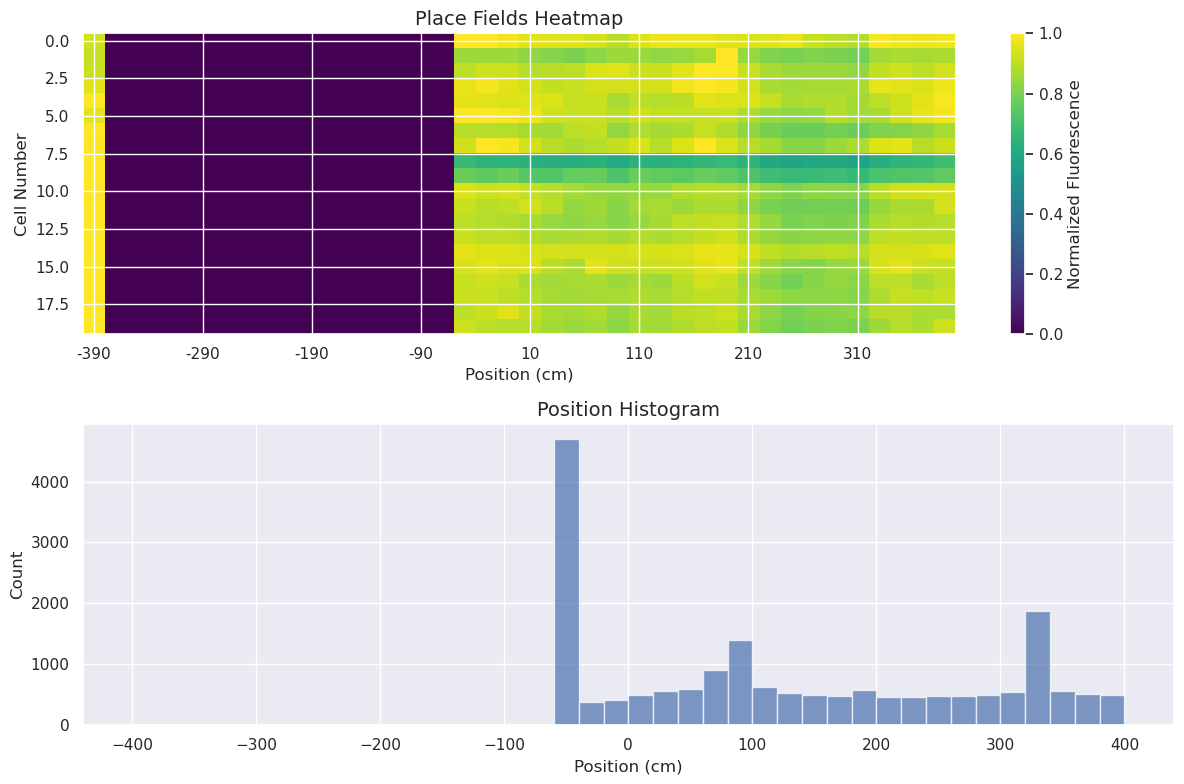

In [11]:
# Get a larger set of cells for the heatmap
num_cells_for_heatmap = 20
heatmap_cell_indices = cell_indices[:min(num_cells_for_heatmap, len(cell_indices))]

# Calculate place fields for all these cells
heatmap_place_fields = np.zeros((len(heatmap_cell_indices), len(bin_centers)))

for i, cell_idx in enumerate(heatmap_cell_indices):
    cell_data = fluor.data[:, cell_idx]
    
    for j in range(len(bin_centers)):
        bin_samples = np.where(binned_positions == j)[0]
        if len(bin_samples) > 0:
            heatmap_place_fields[i, j] = np.mean(cell_data[bin_samples])

# Create a normalized version for better visualization
normalized_place_fields = np.zeros_like(heatmap_place_fields)
for i in range(len(heatmap_cell_indices)):
    cell_min = np.min(heatmap_place_fields[i, :])
    cell_max = np.max(heatmap_place_fields[i, :])
    if cell_max > cell_min:
        normalized_place_fields[i, :] = (heatmap_place_fields[i, :] - cell_min) / (cell_max - cell_min)
    else:
        normalized_place_fields[i, :] = 0

# Create the figure
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.title("Place Fields Heatmap", fontsize=14)
plt.imshow(normalized_place_fields, aspect='auto', cmap='viridis')
plt.colorbar(label="Normalized Fluorescence")
plt.ylabel("Cell Number")
plt.xticks(np.arange(0, len(bin_centers), 5), 
          [f"{x:.0f}" for x in bin_centers[::5]])
plt.xlabel("Position (cm)")

# Also plot position histogram for reference
plt.subplot(212)
plt.title("Position Histogram", fontsize=14)
plt.hist(interp_position, bins=position_bins, alpha=0.7)
plt.xlabel("Position (cm)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

The heatmap reveals a consistent pattern across the neural population:

1. Most cells show minimal activity in the range from approximately -400 cm to -100 cm.

2. There's a sharp transition around -100 cm where cells become active.

3. From 0 cm to 400 cm, cells show diverse patterns of activity, with some cells having preferences for specific positions.

The position histogram below shows that the animal spends most of its time in the positive position range, which aligns with where we see neural activity. This suggests the virtual environment has distinct regions, with the negative position values likely representing a period between trials.

### Neural Responses to Rewards

Since this dataset focuses on how hippocampal neurons encode experiences relative to rewards, let's examine how neural activity changes around the time of reward delivery:

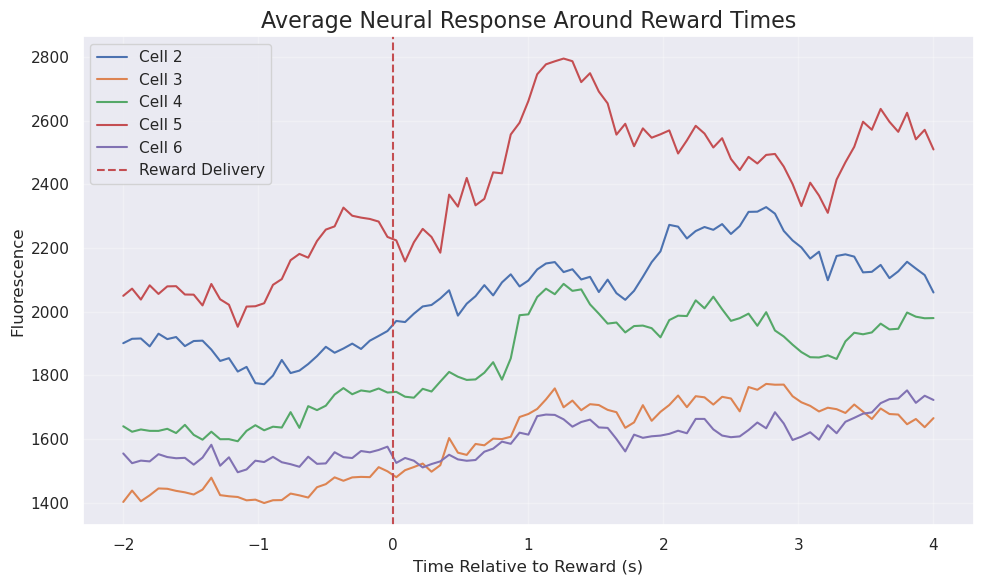

In [12]:
# Define a time window around rewards
pre_reward_time = 2.0  # seconds before reward
post_reward_time = 4.0  # seconds after reward
time_window = pre_reward_time + post_reward_time
samples_per_window = int(time_window * fluor_rate)
times_around_reward = np.linspace(-pre_reward_time, post_reward_time, samples_per_window)

# Select a subset of cells for analysis
num_cells_to_analyze = 5
selected_cells = cell_indices[:min(num_cells_to_analyze, len(cell_indices))]
selected_cells.sort()  # Ensure they're sorted for h5py indexing

# For each reward event, collect neural activity in a window around the reward
all_responses = []
for reward_time in reward_timestamps:
    # Find the neural data indices around this reward time
    start_time = reward_time - pre_reward_time
    end_time = reward_time + post_reward_time
    
    # Skip rewards that would go out of bounds
    if start_time < neural_time_vector[0] or end_time > neural_time_vector[-1]:
        continue
    
    # Find the closest timepoints in the neural data
    start_idx = np.searchsorted(neural_time_vector, start_time)
    end_idx = np.searchsorted(neural_time_vector, end_time)
    
    # Adjust to ensure we have the right number of samples
    if end_idx - start_idx != samples_per_window:
        end_idx = start_idx + samples_per_window
        
    # Make sure we have enough data points
    if end_idx <= fluor.data.shape[0]:
        # Get the window of neural data for all selected cells
        window_data = fluor.data[start_idx:end_idx, selected_cells]
        all_responses.append(window_data)

# Convert to numpy array
all_responses = np.array(all_responses)  # Shape: (n_rewards, time_points, n_cells)

# Calculate the average response across all rewards
avg_response = np.mean(all_responses, axis=0)  # Shape: (time_points, n_cells)

# Plot the average neural response around reward times
plt.figure(figsize=(10, 6))
plt.title("Average Neural Response Around Reward Times", fontsize=16)

for i, cell_idx in enumerate(selected_cells):
    plt.plot(times_around_reward, avg_response[:, i], label=f"Cell {cell_idx}")

plt.axvline(x=0, color='r', linestyle='--', label="Reward Delivery")
plt.xlabel("Time Relative to Reward (s)")
plt.ylabel("Fluorescence")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The analysis of neural responses around reward times reveals several interesting patterns:

1. There is a clear increase in neural activity following reward delivery for most cells.

2. The peak response occurs approximately 1-1.5 seconds after reward delivery, which is consistent with the delayed nature of calcium signals relative to neural spiking.

3. Different cells show varying magnitudes of response, but generally follow a similar temporal pattern.

4. Some cells maintain elevated activity for several seconds after the reward, suggesting persistent encoding of the reward event.

These observations align with the paper's title: "A flexible hippocampal population code for experience relative to reward." The neurons appear to be encoding information about rewards, which could be part of how the hippocampus represents experiences leading up to and following rewards.

## Analyzing Reward-Related Neural Activity Across the Population

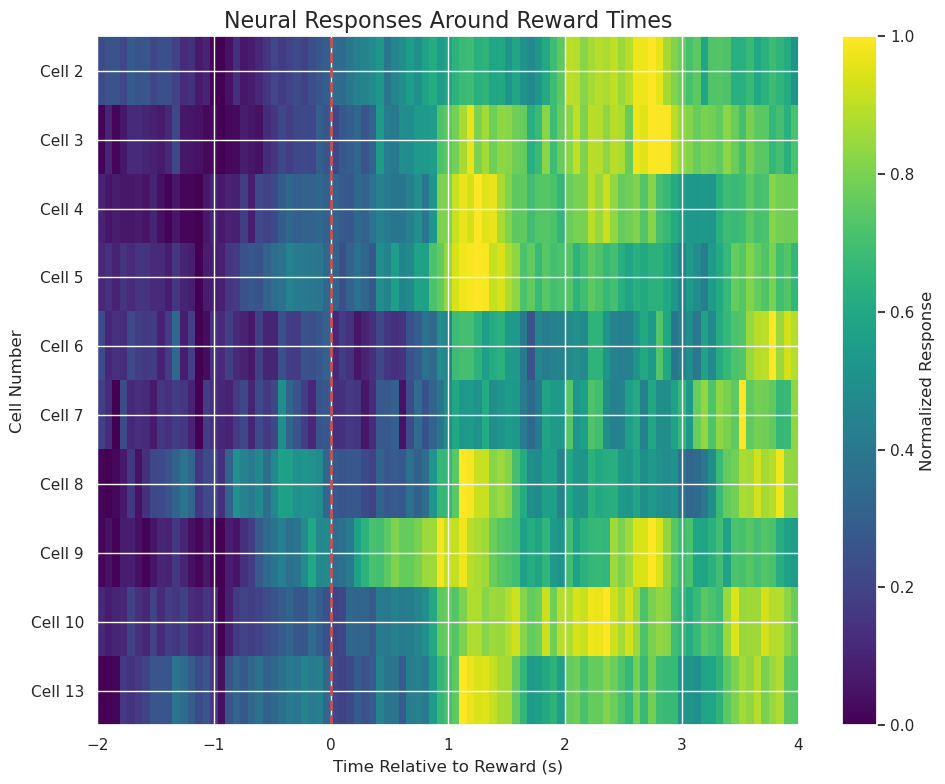

In [13]:
# Create a heatmap of neural responses around reward times for a larger population
num_cells_for_heatmap = 10
heatmap_cells = cell_indices[:min(num_cells_for_heatmap, len(cell_indices))]
heatmap_cells.sort()

# Collect responses for these cells
heatmap_responses = []
for reward_time in reward_timestamps:
    # Find the neural data indices around this reward time
    start_time = reward_time - pre_reward_time
    end_time = reward_time + post_reward_time
    
    # Skip rewards that would go out of bounds
    if start_time < neural_time_vector[0] or end_time > neural_time_vector[-1]:
        continue
    
    # Find the closest timepoints in the neural data
    start_idx = np.searchsorted(neural_time_vector, start_time)
    end_idx = np.searchsorted(neural_time_vector, end_time)
    
    # Adjust to ensure we have the right number of samples
    if end_idx - start_idx != samples_per_window:
        end_idx = start_idx + samples_per_window
        
    # Make sure we have enough data points
    if end_idx <= fluor.data.shape[0]:
        # Get the window of neural data for all heatmap cells
        window_data = fluor.data[start_idx:end_idx, heatmap_cells]
        heatmap_responses.append(window_data)

# Convert to numpy array and calculate average
heatmap_responses = np.array(heatmap_responses)
avg_heatmap_response = np.mean(heatmap_responses, axis=0)  # Shape: (time_points, n_cells)

# Create a normalized version for better visualization
normalized_responses = np.zeros_like(avg_heatmap_response.T)  # Transpose to get cells in rows
for i in range(len(heatmap_cells)):
    cell_min = np.min(avg_heatmap_response[:, i])
    cell_max = np.max(avg_heatmap_response[:, i])
    if cell_max > cell_min:
        normalized_responses[i, :] = (avg_heatmap_response[:, i] - cell_min) / (cell_max - cell_min)
    else:
        normalized_responses[i, :] = 0

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.title("Neural Responses Around Reward Times", fontsize=16)
plt.imshow(normalized_responses, aspect='auto', cmap='viridis', 
           extent=[-pre_reward_time, post_reward_time, len(heatmap_cells)-0.5, -0.5])
plt.colorbar(label="Normalized Response")
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Time Relative to Reward (s)")
plt.ylabel("Cell Number")
plt.yticks(np.arange(len(heatmap_cells)), [f"Cell {cell}" for cell in heatmap_cells])
plt.tight_layout()
plt.show()

The heatmap of reward responses across multiple neurons reveals distinct temporal patterns in how different cells respond to rewards:

1. Most cells show minimal activity in the pre-reward period.

2. Following reward delivery (red vertical line), we observe a coordinated increase in activity across most cells.

3. Some cells respond more rapidly to the reward (within 0.5-1 second), while others show a delayed response (2-4 seconds post-reward).

4. The neural population appears to encode both immediate reward recognition and sustained reward processing through temporally diverse activation patterns.

These observations suggest that hippocampal neurons not only encode spatial information (as seen in the place field analysis) but also integrate reward information, potentially creating a comprehensive representation of both location and reward.

## Summary and Conclusions

In this notebook, we explored Dandiset 001361, which contains hippocampal two-photon calcium imaging data from mice navigating a virtual linear track. Our analysis revealed several key insights:

1. **Behavioral Structure**: Mice navigated a linear virtual track over multiple trials, starting from position ~0 and moving to around 300 cm before being teleported back to start the next trial. Rewards were primarily delivered at a specific location (~100 cm).

2. **Place Cell Activity**: Hippocampal CA1 neurons showed clear spatial tuning, with distinct patterns of activity related to specific positions in the environment. Most neurons were inactive in the negative position range but showed diverse activity patterns in the positive range.

3. **Reward-Related Neural Activity**: We observed consistent increases in neural activity following reward delivery, with different cells showing varying magnitudes and timing of responses. Some cells responded quickly to rewards, while others showed delayed activation, suggesting a temporal cascade of reward processing.

4. **Population Coding**: The population-level analyses (heatmaps) revealed that the hippocampal network encodes both spatial and reward information in a coordinated but diverse manner, consistent with the paper's title emphasizing "a flexible hippocampal population code for experience relative to reward."

These findings align with the understanding that hippocampal neurons not only represent spatial locations (place cells) but also integrate information about behaviorally relevant events like rewards. This dual coding could support the hippocampus's role in memory formation, helping animals remember not just where they've been but also where they've received rewards.

## Future Directions

Future analyses could explore:

1. **Learning Effects**: Analyze how neural representations change across sessions as animals learn the task. This could reveal how the reward-relative code develops with experience.

2. **Trial-by-Trial Analysis**: Examine how neural activity on individual trials relates to behavioral outcomes, such as running speed, licking, or the time to reach rewards.

3. **Sequence Analysis**: Investigate whether hippocampal neurons fire in sequences that represent the path to rewarded locations, which could support prospective navigation or replay.

4. **Cross-Animal Comparisons**: Compare neural coding strategies across different mice in the dataset to assess consistency and variability.

5. **Detailed Reward Zone Analysis**: More thoroughly examine neural activity specifically within the reward zone to understand how spatial and reward coding interact.

This notebook provides a starting point for exploring the rich dataset of hippocampal activity during reward-based navigation. The flexibility of the hippocampal code in representing both spatial and reward information highlights the complexity and sophistication of how the brain encodes experiences in memory-relevant structures.